In [2]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [72]:
def hann_window(delay_filter_length):
    my_arange_tensor = np.arange(delay_filter_length, dtype=np.float32)
    # return 0.5 * (1 - np.cos(2 * np.pi * my_arange_tensor / (delay_filter_length - 1)))
    return 0.5 * (1 + np.cos(math.pi * my_arange_tensor / (delay_filter_length//2)))

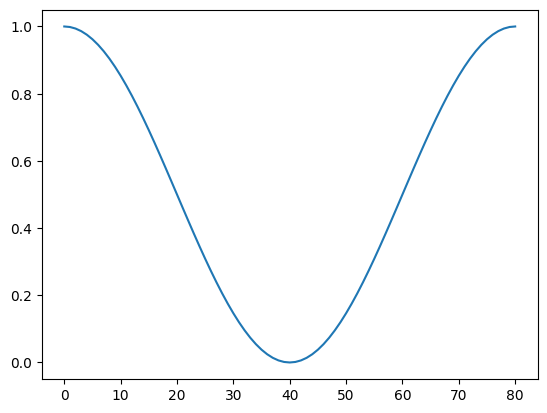

In [74]:
hanning = hann_window(81)
windowed_sinc = torch.special.sinc() * hanning

plt.plot(windowed_sinc)

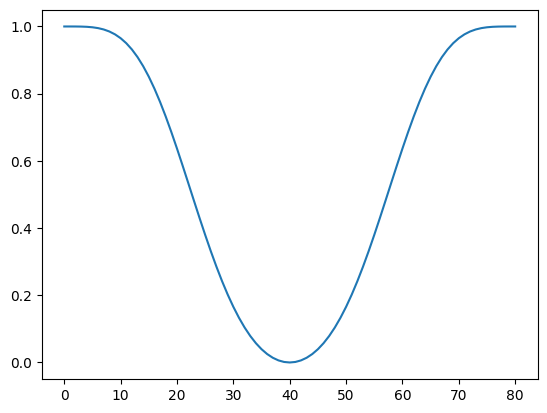

In [68]:
hanning = hann_window(81)

plt.plot(torch.special.sinc(torch.tensor(hanning)))

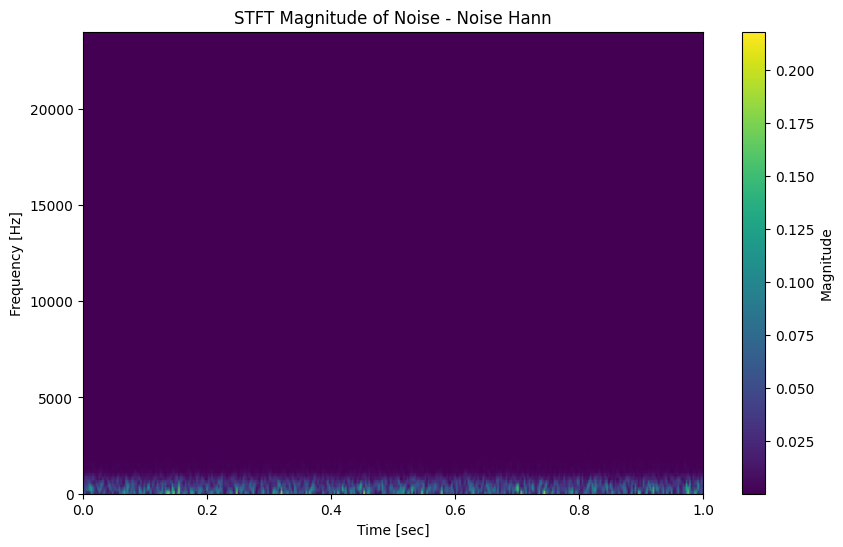

In [51]:

fs = 48000  # Sampling frequency
hanning = hann_window(81)
duration = 1  # seconds

t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# NOISE
noise = np.random.randn(len(t))
noise_hann = np.convolve(hanning, noise, mode='same') / np.sum(np.hanning(81))
f, t, Zxx = scipy.signal.stft(noise_hann, fs, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Magnitude of Noise - Noise Hann")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()

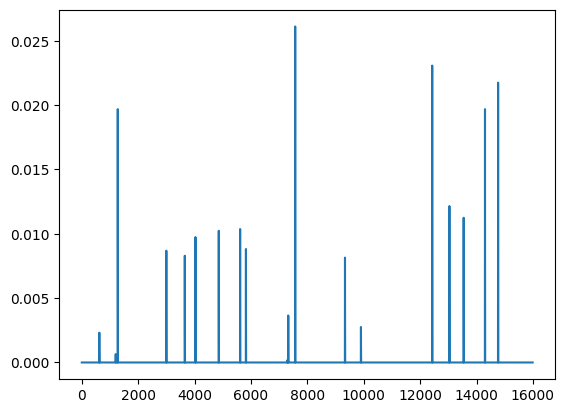

In [55]:
fs = 16000  # Sampling frequency
hanning = hann_window(9)
duration = 1  # seconds
signal = np.linspace(0, duration, int(fs*duration), endpoint=False)
# Diracs
signal = np.zeros_like(signal)
num_diracs = 20

# Randomly place Dirac deltas
for _ in range(num_diracs):
    # Random time index for the Dirac delta
    idx = np.random.randint(0, len(signal))
    # Random amplitude for the Dirac delta
    amplitude = np.random.uniform(0, 1)  # Change amplitude range as needed
    signal[idx] = amplitude

signal_hann = np.convolve(signal,hanning, mode='valid') / np.sum(np.hanning(81))
plt.plot(signal_hann)

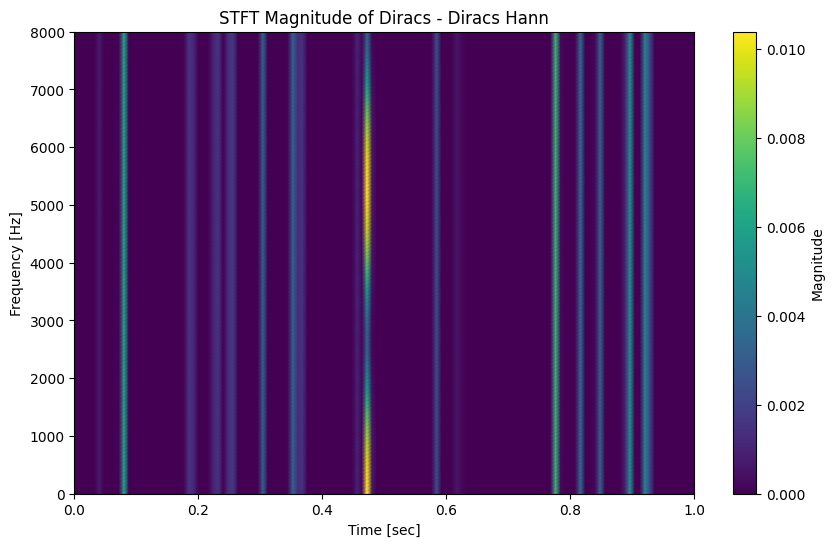

In [56]:
f, t, Zxx = scipy.signal.stft(signal, fs, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Magnitude of Diracs - Diracs Hann")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()

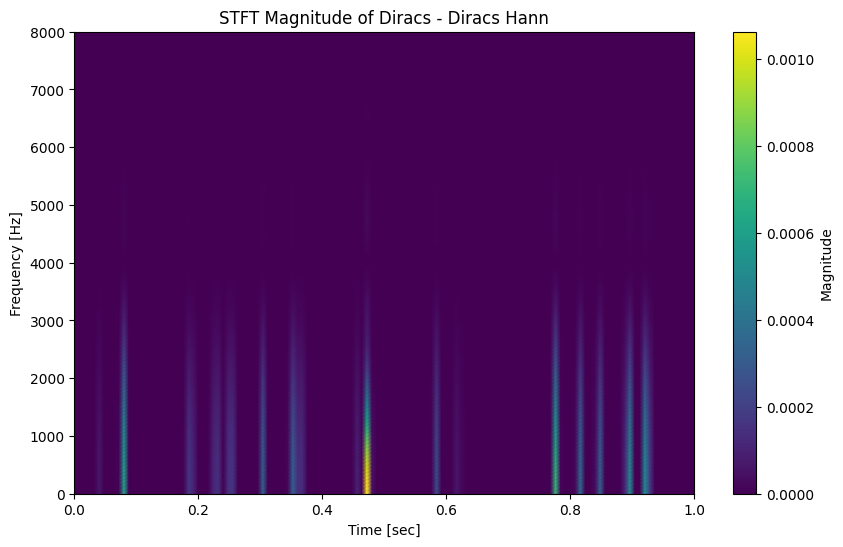

In [57]:
f, t, Zxx = scipy.signal.stft(signal_hann, fs, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Magnitude of Diracs - Diracs Hann")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()

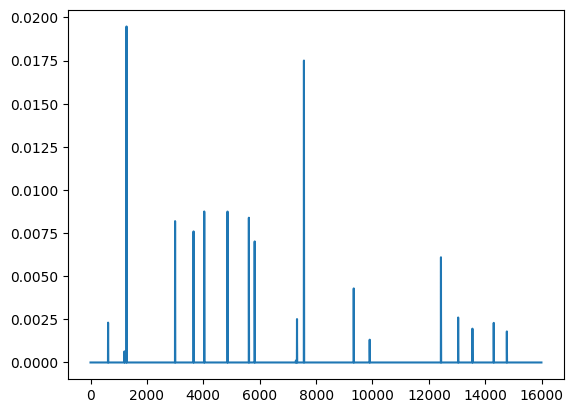

In [65]:
band_passed_signal = torch.special.sinc(torch.linspace(0, duration, int(fs*duration)))[:15992] * signal_hann
plt.plot(band_passed_signal)

In [ ]:
f, t, Zxx = scipy.signal.stft(band_passed_signal, fs, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Magnitude of Diracs - Diracs Hann")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()